## Name: Franklin Limaico


# Homework 1: Interstellar Medium

The homework should be submitted as a python notebook. 

Please email the homework to hdenes@yachaytech.edu.ec by the <b>end of the day (midnight) by the 5th of October.</b>

Total points: 20

Please let me know if you have any questions. 

<b>Important notes: </b> 
- The tutorial notebooks contain the methods that you can use to solve the homework. 
- If you have problems with some of the specific astrophysics packages, make sure to check the versions. Not all versions of the packages are compatible with each other. In particular astroquery has problems with some versions of astropy. This is a combination of the two packages that should work together:
    - astroquery==0.4.6
    - astropy==5.1.1
- Also check the package requirements for GaussPy+ 


## 1. (12 points) Analysis of interstellar gas components using Gaussian decomposition

This problem analyses the properties of a neutral hydrogen (HI) cloud in the Small Magellanic Cloud (SMC). The data was taken with the ASKAP telescope and is a subset of the data presented in Pingel et al. 2022 (https://doi.org/10.1017/pasa.2021.59).

1. Read in the data from the "cloud_sub_cube.fits" file (In the Homework/data directory). What are the dimensions of the data cube?
2. Make a declination vs. velocity plot. How many distinct features can you see in the plot? 
3. Make a spectrum of the whole cube (velocity vs intensity summed for all spatial pixels). Can you identify the same features (lines) as in the declination vs. velocity plot? Do you see any differences? 
4. Make a moment 0 map (inegrated intensity map) of the following velocity range: 96 - 113 km/s. 
- For this, make an array of the relevant velocity range by calculating the values for the velocity axis in km/s. 
- Use numpy.where() to find the indecies for the relevant velocity range, 
- then use indecies to select the relevant part of the data cube. 
- Once you have the sub-array, calculate the integrated intensity for each pixel and make a plot. 

What kind of structure do you see?

5. Decompose the full data cube with GaussPy+ (https://github.com/mriener/gausspyplus). 
- For the decomposition you can use the following $\alpha _1 = 1.59$ and $\alpha _2 = 5.9$ parameters. 
- You should update the "step_4-decompose--grs.py" file with these number. 
- <b> Note: I do not recommend to run the sections: "1. Create a training set from the data" and "2. Find the optimal values for the smoothing parameters $\alpha_1$ and $\alpha_2$". These are computationally intensive and can take a long time. </b>

6. Based on the $\chi^2$ map, did the decomposition perform well? How many components did Gausspy find on average?
7. Make histograms of the decomposition results for $v_{LSR}$ , FWHM (full width at half max), and amplitude. What can you conclude about the structure of the interstellar gas based on the histograms?
8. Make a scatter plot of $v_{LSR}$ vs. FWHM. How many distinct features do you see? 
9. Make a map of the Gaussian components with $ 96 < v_{LSR} < 113$ km/s.
10. Make a plot of the spectrum with the Gaussian components for the following pixels: x: 110, y:100; x:55, y:50; x:160, y:160. Does the spectra show the same features at these 3 different positions?


**1.1**  Read in the data from the "cloud_sub_cube.fits" file (In the Homework/data directory). What are the dimensions of the data cube?


**Source: View_ISM_data_v1.ipynb**

In [1]:
# viewing the content of the fits data cube

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS


# for the animation
import glob
from PIL import Image
import os
from IPython import display

In [2]:
pwd

'/mnt/c/Users/frnkl/Desktop/DECIMO SEMESTRE/Astrophysical_Objects/Notebooks_mine_version/Homework'

In [3]:
ls

Homework_1_ISM.ipynb*  data/


In [4]:
# opening the data file

data_dir = "./data/"
file = 'cloud_sub_cube.fits'
hdul = fits.open(data_dir+file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h = hdul[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d = hdul[0].data

In [5]:
# viewing the metadata
#print(h)

In [6]:
# check the shape of teh data

print(d.shape)

(220, 180, 180)


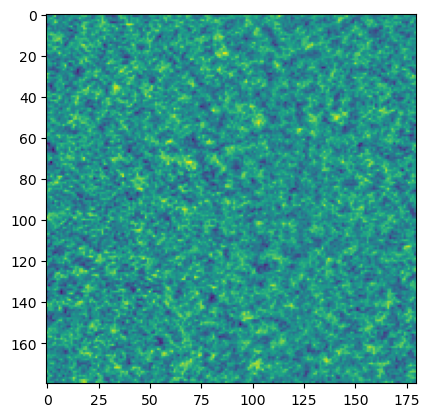

In [12]:
# print slices of the data

plt.imshow(d[219,:,:])

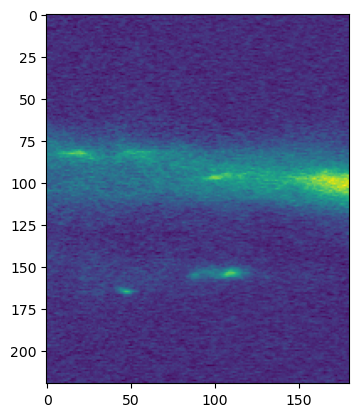

In [13]:
# print slices of the data
# note that most of the gas is at specific velocities

plt.imshow(d[:,100,:])

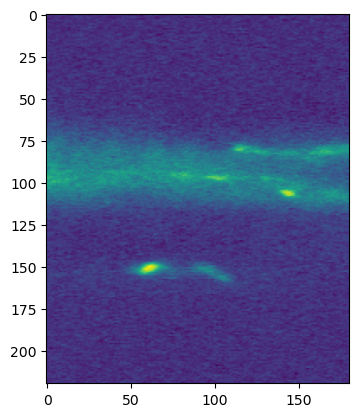

In [14]:
plt.imshow(d[:,:,100])

# What is the structure of d?

What axis is velocity and declination and R.A.?

**1.2.**  Make a declination vs. velocity plot. How many distinct features can you see in the plot? 

**Source: View_ISM_data_v1.ipynb**


In [10]:
print(h['CDELT3'])
print(h['CUNIT3'])
print(h['CRPIX1'], h['CRPIX2'], h['CRPIX3'])
print(h['CRVAL3'])

-977.198303423
m/s
504.0 -508.0 1.0
257847.381515


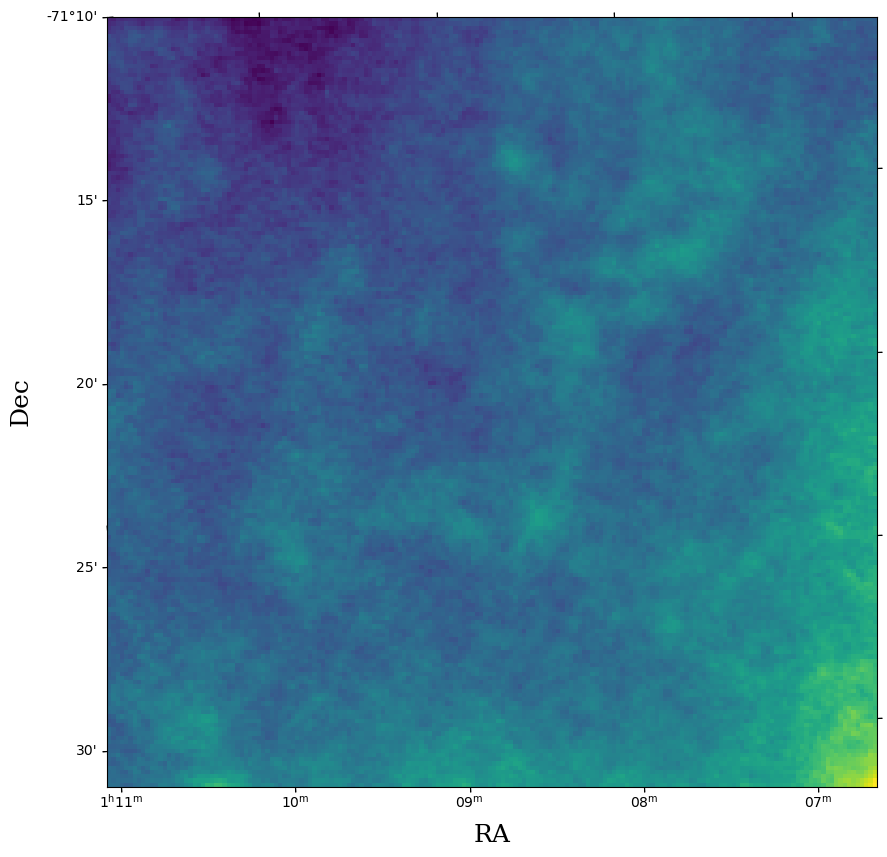

In [47]:
fig = plt.figure(figsize=(11,10))

# moment 0 - integrated intensity per pixel
d_2_av = np.sum(d, axis=0)* abs(h['CDELT3'])/1000

ax = fig.add_subplot(1,1,1, projection=WCS(h), slices=('x', 'y', 50))
plt.imshow(d_2_av)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

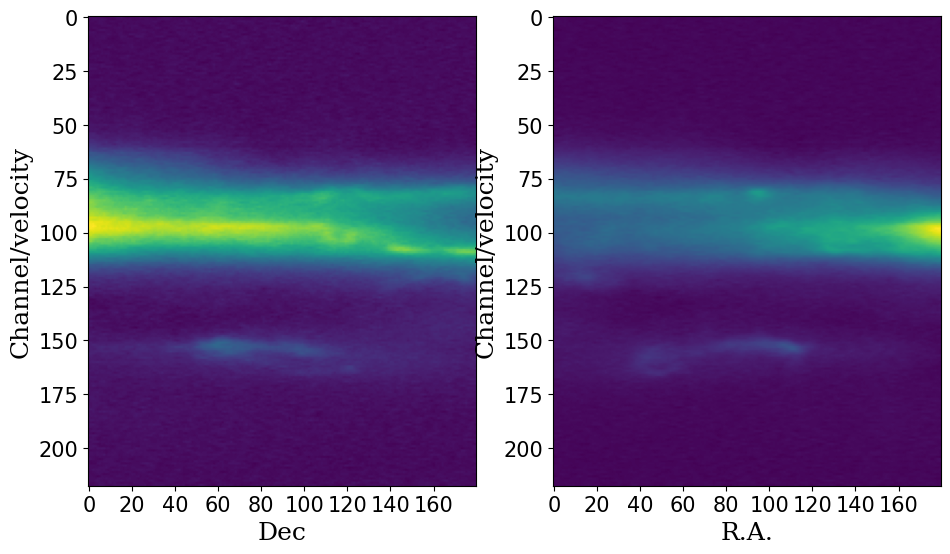

In [56]:
fig = plt.figure(figsize=(11,8))

d_2_av2 = np.mean(d, axis=2) # axis 2 is the RA
d_2_av3 = np.mean(d, axis=1) # axis 2 is the RA

ax = fig.add_subplot(1,2,1)
plt.imshow(d_2_av2[:-2,:])

ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/velocity', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = fig.add_subplot(1,2,2)
plt.imshow(d_2_av3[:-2,:])

ax.set_xlabel('R.A.', size=18,family='serif')
ax.set_ylabel('Channel/velocity', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

**1.3** Make a spectrum of the whole cube (velocity vs intensity summed for all spatial pixels). Can you identify the same features (lines) as in the declination vs. velocity plot? Do you see any differences? 

**Source: Plot_decomposed_spectra.ipynb**

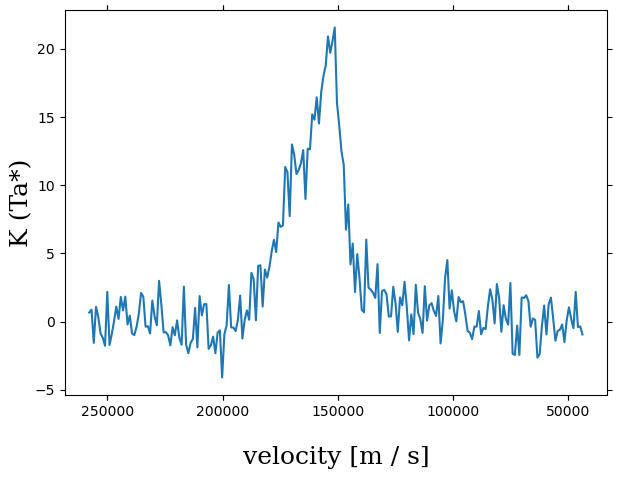

In [54]:
# make figure

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1, projection=WCS(h), slices=(50, 50, 'x'))
plt.plot(d[:,179,179])  # the last channel if the data cube is bad (with very high noise), so we don't include that in the plot
ax.set_xlabel('velocity [m / s]', size=18,family='serif')
ax.set_ylabel('K (Ta*)', size=18,family='serif')

plt.show()

**1.4** Make a moment 0 map (inegrated intensity map) of the following velocity range: 96 - 113 km/s. 
- For this, make an array of the relevant velocity range by calculating the values for the velocity axis in km/s. 
- Use numpy.where() to find the indecies for the relevant velocity range, 
- then use indecies to select the relevant part of the data cube. 
- Once you have the sub-array, calculate the integrated intensity for each pixel and make a plot. 

## 2. (6 points) Comparing Dust maps to atomic hydrogen column density

The aim of this problem is to compare the interstellar dust extinction to the neutral hydrogen column density of the same region in the sky.

1. Make a map of dust extinction ($A_v$) using the dustmaps python package (https://dustmaps.readthedocs.io/en/latest/) for the following region: R.A: 73.0$^{\circ}$ Dec: 3.0$^{\circ}$. Select the region so that it has a width of 10$^{\circ}$ x 10$^{\circ}$. Use data from the "Bayestar" dust map (Green et al. 2019 https://doi.org/10.3847/1538-4357/ab5362). 
2. Get the neutral atomic hydrogen column density N(HI) map for the same region of the sky. For this you can use the astroquery python package and select the 'HI4PI' survey. Make sure to select the same region with the same pixel size. 
3. Make an overlay of the two data sets. Plot N(HI) as the contours. 
4. Make histograms of $A_v$ and N(HI). Compare the two distributions. What do you notice about the two distributions?
5. Make a plot of $A_v$ vs. N(HI). Fit a linear relation to the data. How does the fit compare to the relation found in Güver and Özel 2009 (https://doi.org/10.1111/j.1365-2966.2009.15598.x): N(HI) = $A_v \times 2.2 \times 10^{21}$?
6. What do you think is the reason for the differences between your fit and the results of Güver and Özel 2009?